In [60]:
import os
import numpy as np
# import fiftyone.zoo as foz
# import fiftyone.types as fot
# import json

# import torch
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [61]:
gt_store_path = 'ground_truth'
pt_store_path = 'model_pred'
image_path = 'tiny_coco_subset/data'
imagename = "000000006614.jpg"

gt_path = os.path.join(gt_store_path, imagename.replace('.jpg', '.csv'))
pt_path = os.path.join(pt_store_path, imagename.replace('.jpg', '.csv'))
img_path = os.path.join(image_path, imagename)

GT = pd.read_csv(gt_path,  index_col=0, names=["x", "y", "w", "h", "id", "object"], header=None,skiprows = 1).drop(columns='id')
PT = pd.read_csv(pt_path,  index_col=0, names=["x", "y", "w", "h", "object"], header=None,skiprows = 1)
img = Image.open(img_path).convert("RGB")

imggt = img.copy()
imgpt = img.copy()

draw = ImageDraw.Draw(imggt)
for idx,anot in GT.iterrows():
    x, y, w, h , name = anot
    x_min = x
    y_min = y
    x_max = x_min + w
    y_max = y_min + h

    draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
    draw.text((x_min, max(0, y_min - 10)), name, fill="red",font = ImageFont.truetype("DejaVuSans.ttf", size=20))


draw = ImageDraw.Draw(imgpt)
for idx,anot in PT.iterrows():
    x, y, w, h , name = anot
    x_min = x
    y_min = y
    x_max = x_min + w
    y_max = y_min + h

    draw.rectangle([x_min, y_min, x_max, y_max], outline="orange", width=3)
    draw.text((x_min, max(0, y_min - 10)), name, fill="orange",font = ImageFont.truetype("DejaVuSans.ttf", size=20))

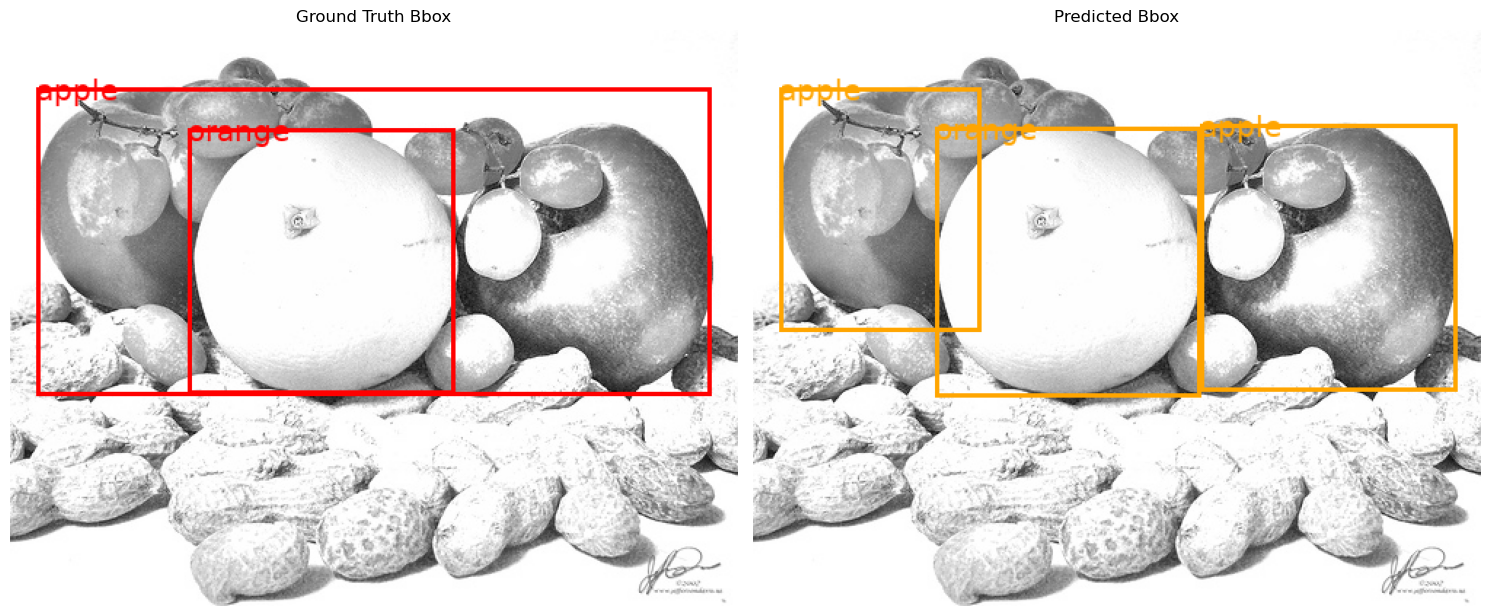

In [62]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.imshow(imggt)
plt.axis('off')
plt.title("Ground Truth Bbox")
plt.subplot(1,2,2)
plt.imshow(imgpt)
plt.axis('off')
plt.title("Predicted Bbox")

plt.tight_layout()
plt.show()